In [1]:
import sklearn
import shap
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Compare data with UCI

Check if normalisation messes things up

Apply example dataset to logistic regression


# Apply test code to UCI data

In [10]:
#Import dataset
df_uci = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\UCI_Credit_Card.csv')
df_uci.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
df_uci.drop(columns=['ID'], inplace=True)
df_uci.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [33]:
X = df_uci.iloc[:,:-1]
y= np.array(df_uci.loc[:,'default.payment.next.month'])
# y=y.reshape((len(np.array(df_uci)),1))

# y=pd.DataFrame(y)
# y=y.squeeze
# print(X.shape)

In [34]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
uci_shap_values = explainer(X_test)

Permutation explainer: 6001it [1:14:16,  1.35it/s]                                                                     


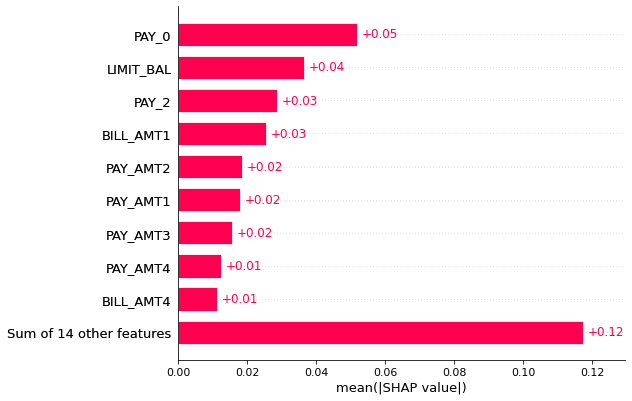

In [37]:
shap.plots.bar(uci_shap_values)

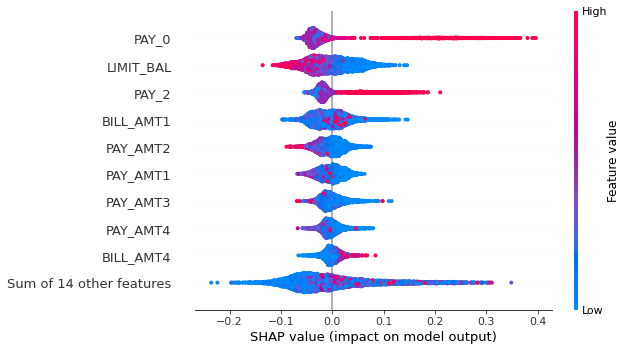

In [38]:
shap.plots.beeswarm(uci_shap_values)

In [39]:
uci_shap_values

.values =
array([[-0.03118592,  0.00365408, -0.00568308, ..., -0.0014275 ,
        -0.008944  ,  0.0018345 ],
       [ 0.02003175, -0.00138   ,  0.00492542, ..., -0.00570333,
        -0.00390625, -0.01171625],
       [ 0.033245  , -0.002065  ,  0.00706917, ...,  0.00337917,
         0.00346   ,  0.01293   ],
       ...,
       [ 0.0359625 , -0.00319   , -0.00520167, ..., -0.01093583,
        -0.001285  ,  0.00389   ],
       [-0.030575  , -0.001375  , -0.00136917, ..., -0.01611   ,
         0.01625   , -0.0013025 ],
       [ 0.08538875, -0.001625  , -0.00379667, ...,  0.01336167,
        -0.001145  , -0.00916   ]])

.base_values =
array([0.27605, 0.27605, 0.27605, ..., 0.27605, 0.27605, 0.27605])

.data =
array([[1.3000e+05, 1.0000e+00, 2.0000e+00, ..., 3.9600e+02, 3.9600e+02,
        3.9600e+02],
       [2.0000e+04, 2.0000e+00, 3.0000e+00, ..., 3.6900e+02, 4.0000e+02,
        5.1250e+03],
       [3.0000e+04, 2.0000e+00, 1.0000e+00, ..., 2.0900e+02, 2.0600e+02,
        1.6000e+02],
   

# Same analysis for synthetically generated dataset usign CTGAN

In [43]:
#Import dataset
df_uci_ctgan = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\UCI_CTGAN_30k.csv', index_col=0)
df_uci_ctgan.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,422663.499888,2,2,1,35,0,0,0,0,0,...,331096.297784,128805.184846,167658.632447,5024.445895,12120.027694,45515.230530,9839.302731,6962.442296,162427.257836,0
1,236171.474061,2,3,3,36,0,0,0,0,0,...,78819.080031,107586.456526,125186.910796,5067.608318,4921.849077,10340.092866,5012.002663,2900.048309,11966.569215,0
2,124864.148191,2,3,1,33,0,0,0,0,2,...,87507.805687,95098.902252,137119.139734,5937.875535,4490.752359,9871.589399,5283.373630,10546.496886,12967.492746,1
3,146061.682051,2,1,2,21,0,0,0,0,0,...,124192.702183,121500.453771,113477.070830,4626.935766,4674.426827,5045.033791,10282.794770,4542.091724,7209.053885,0
4,398260.394198,2,1,1,34,-1,-1,-1,-1,0,...,128863.727718,100348.309718,18515.392766,99394.748747,113115.710029,123121.010136,18249.359122,26900.969125,95745.002537,0


In [44]:
X = df_uci_ctgan.iloc[:,:-1]
y= np.array(df_uci_ctgan.loc[:,'default.payment.next.month'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
ctgan_uci_shap_values = explainer(X_test)

Permutation explainer: 6001it [1:06:44,  1.50it/s]                                                                     


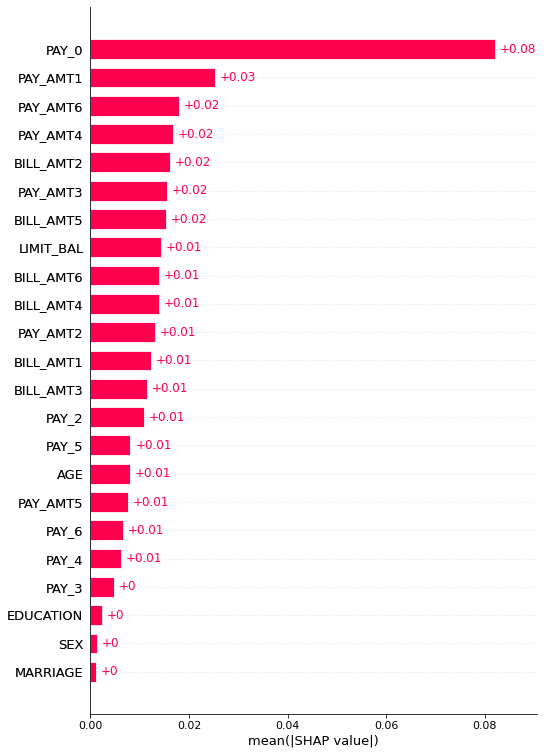

In [55]:
shap.plots.bar(ctgan_uci_shap_values, max_display = 23)

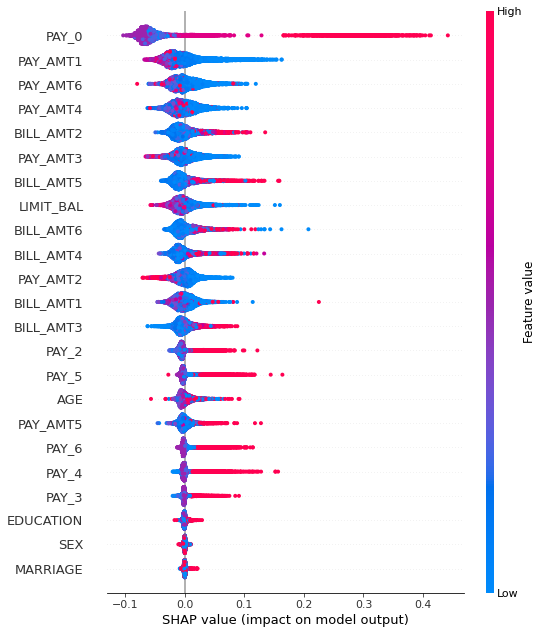

In [57]:
shap.plots.beeswarm(ctgan_uci_shap_values, max_display = 23)